# Estudo dos personagens do LoL - S13

In [1]:
# Importações
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
#Funcoes
def grafico_barras(data, x:str, y:str):
    sns.barplot(data=data, y=y, x=x)


Perguntas:
- Quais personagens tem a maior taxa de vitoria por Role
- Quais campeoes tem a maior e menor taxa de ban
- Quais tem o maior e menor KDA

In [2]:
# Abrindo arquivos
dados_stats1 = pd.read_csv('archive/League of Legends Champion Stats 13.1.csv', sep=';')
dados_stats3 = pd.read_csv(
    'archive/League of Legends Champion Stats 13.3.csv', sep=';')


In [3]:
dados_stats1

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,Aatrox,Fighter,TOP,S,57.63,-31.86,47.68%,91.63%,6.62%,11.98%,1.77
1,Ahri,Mage,MID,S,57.18,4.55,49.50%,94.65%,5.81%,1.73%,2.58
2,Akali,Assassin,MID,S,65.49,4.33,48.41%,75.74%,8.11%,13.02%,2.37
3,Akali,Assassin,TOP,C,39.63,-1.51,45.92%,23.50%,2.55%,13.02%,2.00
4,Akshan,Marksman,MID,A,49.39,0.34,51.62%,66.03%,2.75%,3.79%,2.26
...,...,...,...,...,...,...,...,...,...,...,...
239,Zilean,Support,MID,A,51.52,-3.47,53.33%,15.52%,0.49%,1.40%,3.59
240,Zilean,Support,SUPPORT,A,48.35,-2.49,50.95%,79.72%,2.67%,1.40%,3.11
241,Zoe,Mage,MID,A,48.46,2.43,49.14%,87.85%,3.45%,1.45%,2.60
242,Zoe,Mage,SUPPORT,D,28.33,-3.55,47.73%,10.03%,0.37%,1.45%,2.14


In [4]:
dados_stats1.rename(columns={ 'Win %':'taxa_vitoria', 'Role %': 'taxa_role', 'Pick %':'taxa_escolha', 'Ban %':'taxa_ban'}, inplace=True)
dados_stats3.rename(columns={ 'Win %':'taxa_vitoria', 'Role %': 'taxa_role', 'Pick %':'taxa_escolha', 'Ban %':'taxa_ban'}, inplace=True)

In [5]:
dados_stats3

,Name,Class,Role,Tier,Score,Trend,taxa_vitoria,taxa_role,taxa_escolha,taxa_ban,KDA
0,Aatrox,Fighter,TOP,A,53.65,0,48.17%,92.75%,5.14%,6.60%,1.85
1,Ahri,Mage,MID,S,55.93,0,49.89%,90.41%,9.01%,2.54%,2.61
2,Akali,Assassin,MID,A,50.75,0,48.29%,71.88%,6.91%,11.01%,2.36
3,Akali,Assassin,TOP,C,40.63,0,45.95%,27.15%,2.54%,11.01%,1.99
4,Akshan,Marksman,MID,A,50.47,0,51.67%,65.15%,2.48%,3.47%,2.27
...,...,...,...,...,...,...,...,...,...,...,...
236,Zilean,Support,MID,A,51.20,0,50.39%,12.58%,0.33%,1.05%,3.47
237,Zilean,Support,SUPPORT,B,47.29,0,50.49%,81.61%,2.20%,1.06%,3.05
238,Zoe,Mage,MID,A,50.38,0,50.20%,87.20%,3.17%,1.68%,2.65
239,Zoe,Mage,SUPPORT,D,30.46,0,47.10%,11.02%,0.38%,1.62%,2.12


In [50]:
quantidade_por_role = dados_stats3.groupby('Role').count().sort_values('Name', ascending=False)[['Name', 'Tier']].reset_index()
quantidade_por_role


,Role,Name,Tier
0,TOP,61,61
1,MID,59,59
2,SUPPORT,48,48
3,JUNGLE,47,47
4,ADC,26,26


In [51]:
#Contagem de herois por ROle
#quantidade_por_role = dados_stats3.groupby('Role').count()['Role', 'KDA']
#df_qtd_por_role = pd.DataFrame(teste)
quantidade_por_role.rename(columns={'Name':'quantidade'}, inplace=True)
df_qtd_role = quantidade_por_role[['Role', 'quantidade']]
df_qtd_role

,Role,quantidade
0,TOP,61
1,MID,59
2,SUPPORT,48
3,JUNGLE,47
4,ADC,26


<AxesSubplot: xlabel='Role', ylabel='quantidade'>

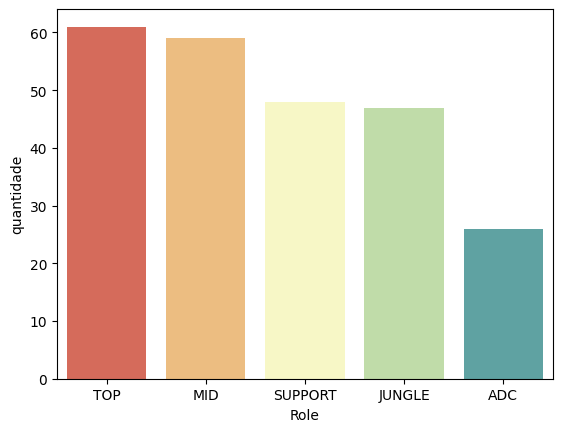

In [55]:
sns.color_palette("pastel")
sns.barplot(data=df_qtd_role, y='quantidade', x='Role', palette='Spectral')


In [48]:
#Classificar por classe
quantidade_por_classe = dados_stats3.groupby(
    'Class').count().sort_values('Name', ascending=False)[['Name', 'Tier']].reset_index()
quantidade_por_classe.rename(columns={'Name': 'quantidade'}, inplace=True)
df_qtd_classe = quantidade_por_classe[['Class', 'quantidade']]
df_qtd_classe


,Class,quantidade
0,Fighter,68
1,Mage,61
2,Marksman,35
3,Tank,31
4,Assassin,26
5,Support,19


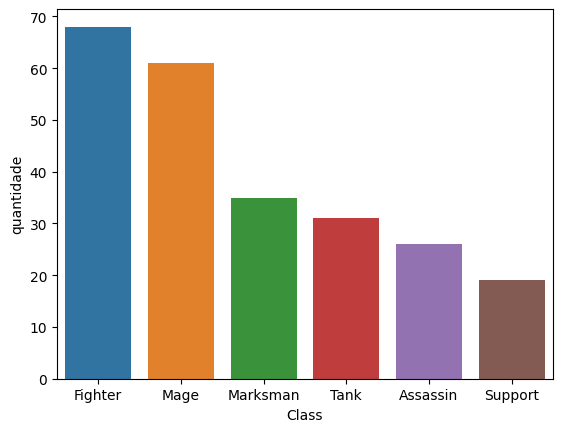

In [49]:
grafico_barras(df_qtd_classe, 'Class', 'quantidade')


In [ ]:
#Taxa de Vitória por Role
roles = dados_stats3.Role.unique().tolist()

for role in roles:
    campeoes = dados_stats3[dados_stats3["Role"] == role].sort_values(
        'taxa_vitora', ascending=False)['Name'].tolist()
    
    print(
        f'As melhores Win Rate do {role} são:\n 1° Colocado --> {campeoes[0]}\n 2° Colocado --> {campeoes[1]}\n 3° Colocado --> {campeoes[2]}')
    print(f'O pior Win Rate do {role} é {campeoes[-1]} \n')


Os melhores TOP são:
 1° Colocado --> Kled
 2° Colocado --> Olaf
 3° Colocado --> Dr. Mundo
O TOP com pior taxa de vitória é Alistar 

Os melhores MID são:
 1° Colocado --> Annie
 2° Colocado --> Singed
 3° Colocado --> Kennen
O MID com pior taxa de vitória é Azir 

Os melhores SUPPORT são:
 1° Colocado --> Annie
 2° Colocado --> Rell
 3° Colocado --> Rakan
O SUPPORT com pior taxa de vitória é Yuumi 

Os melhores JUNGLE são:
 1° Colocado --> Jarvan IV
 2° Colocado --> Maokai
 3° Colocado --> Udyr
O JUNGLE com pior taxa de vitória é Qiyana 

Os melhores ADC são:
 1° Colocado --> Nilah
 2° Colocado --> Karthus
 3° Colocado --> Seraphine
O ADC com pior taxa de vitória é Aphelios 



In [ ]:
# Taxa de Vitória por Classe de Herói
classes = dados_stats3.Class.unique().tolist()
classes.pop(6)

for classe in classes:
    campeoes = dados_stats3[dados_stats3["Class"] == classe].sort_values(
        'taxa_vitora', ascending=False)['Name'].tolist()

    print(
        f'Os melhores Win Rate da classe {classe} são:\n 1° Colocado --> {campeoes[0]}\n 2° Colocado --> {campeoes[2]}\n 3° Colocado --> {campeoes[3]}')
    print(f'O pior Win Rate da classe {classe} é {campeoes[-1]} \n')


Os melhores Fighter são:
 1° Colocado --> Kled
 2° Colocado --> Udyr
 3° Colocado --> Tryndamere
O Fighter com pior taxa de vitória é Trundle 

Os melhores Mage são:
 1° Colocado --> Annie
 2° Colocado --> Karthus
 3° Colocado --> Kennen
O Mage com pior taxa de vitória é Azir 

Os melhores Assassin são:
 1° Colocado --> Nocturne
 2° Colocado --> Fizz
 3° Colocado --> Yone
O Assassin com pior taxa de vitória é Qiyana 

Os melhores Marksman são:
 1° Colocado --> Nilah
 2° Colocado --> Xayah
 3° Colocado --> Tristana
O Marksman com pior taxa de vitória é Miss Fortune 

Os melhores Tank são:
 1° Colocado --> Singed
 2° Colocado --> Jarvan IV
 3° Colocado --> Maokai
O Tank com pior taxa de vitória é Alistar 

Os melhores Support são:
 1° Colocado --> Rakan
 2° Colocado --> Braum
 3° Colocado --> Janna
O Support com pior taxa de vitória é Yuumi 



In [ ]:
# Taxa de Escolha por Role
roles = dados_stats3.Role.unique().tolist()

for role in roles:
    campeoes = dados_stats3[dados_stats3["Role"] == role].sort_values(
        'taxa_escolha', ascending=False)['Name'].tolist()

    print(
        f'Os {role} mais escolhidos são:\n 1° Colocado --> {campeoes[0]}\n 2° Colocado --> {campeoes[1]}\n 3° Colocado --> {campeoes[2]}')
    print(f'O {role} menos escolhido é {campeoes[-1]} \n')


Os TOP mais escolhidos são:
 1° Colocado --> Darius
 2° Colocado --> Gangplank
 3° Colocado --> Sett
O TOP menos escolhido é Skarner 

Os MID mais escolhidos são:
 1° Colocado --> Ahri
 2° Colocado --> Zed
 3° Colocado --> Yone
O MID menos escolhido é Quinn 

Os SUPPORT mais escolhidos são:
 1° Colocado --> Nautilus
 2° Colocado --> Thresh
 3° Colocado --> Lulu
O SUPPORT menos escolhido é Ivern 

Os JUNGLE mais escolhidos são:
 1° Colocado --> Kayn
 2° Colocado --> Maokai
 3° Colocado --> Jarvan IV
O JUNGLE menos escolhido é Qiyana 

Os ADC mais escolhidos são:
 1° Colocado --> Miss Fortune
 2° Colocado --> Lucian
 3° Colocado --> Tristana
O ADC menos escolhido é Veigar 



In [ ]:
# Taxa de Escolha por Classe de Herói
classes = dados_stats3.Class.unique().tolist()
classes.pop(6)

for classe in classes:
    campeoes = dados_stats3[dados_stats3["Class"] == classe].sort_values(
        'taxa_escolha', ascending=False)['Name'].tolist()

    print(
        f'Os {classe} mais escolhidos são:\n 1° Colocado --> {campeoes[0]}\n 2° Colocado --> {campeoes[2]}\n 3° Colocado --> {campeoes[3]}')
    print(f'O {classe} menos escolhido é {campeoes[-1]} \n')


Os Fighter mais escolhidos são:
 1° Colocado --> Darius
 2° Colocado --> Kayn
 3° Colocado --> Sett
O Fighter menos escolhido é Skarner 

Os Mage mais escolhidos são:
 1° Colocado --> Ahri
 2° Colocado --> Sylas
 3° Colocado --> Morgana
O Mage menos escolhido é Neeko 

Os Assassin mais escolhidos são:
 1° Colocado --> Zed
 2° Colocado --> Akali
 3° Colocado --> Master Yi
O Assassin menos escolhido é Qiyana 

Os Marksman mais escolhidos são:
 1° Colocado --> Miss Fortune
 2° Colocado --> Tristana
 3° Colocado --> Zeri
O Marksman menos escolhido é Quinn 

Os Tank mais escolhidos são:
 1° Colocado --> Nautilus
 2° Colocado --> Jarvan IV
 3° Colocado --> Blitzcrank
O Tank menos escolhido é Singed 

Os Support mais escolhidos são:
 1° Colocado --> Thresh
 2° Colocado --> Nami
 3° Colocado --> Pyke
O Support menos escolhido é Ivern 



In [ ]:
# Taxa de Escolha por Role
roles = dados_stats3.Role.unique().tolist()

for role in roles:
    campeoes = dados_stats3[dados_stats3["Role"] == role].sort_values(
        'taxa_ban', ascending=False)['Name'].tolist()

    print(
        f'Os {role} com maior taxa de ban são:\n 1° Colocado --> {campeoes[0]}\n 2° Colocado --> {campeoes[1]}\n 3° Colocado --> {campeoes[2]}')
    print(f'O {role} com menor taxa de ban {campeoes[-1]} \n')


Os TOP com maior taxa de ban são:
 1° Colocado --> Yone
 2° Colocado --> Illaoi
 3° Colocado --> K'Sante
O TOP menos escolhido é Skarner 

Os MID com maior taxa de ban são:
 1° Colocado --> Yone
 2° Colocado --> Katarina
 3° Colocado --> Aurelion Sol
O MID menos escolhido é Corki 

Os SUPPORT com maior taxa de ban são:
 1° Colocado --> Nautilus
 2° Colocado --> Lulu
 3° Colocado --> Amumu
O SUPPORT menos escolhido é Ziggs 

Os JUNGLE com maior taxa de ban são:
 1° Colocado --> Amumu
 2° Colocado --> Evelynn
 3° Colocado --> Rengar
O JUNGLE menos escolhido é Skarner 

Os ADC com maior taxa de ban são:
 1° Colocado --> Tristana
 2° Colocado --> Vayne
 3° Colocado --> Nilah
O ADC menos escolhido é Ziggs 



In [31]:
#Maiores Scores para TOP
dados_stats3[dados_stats3["Role"] == 'MID'].sort_values(
    'taxa_vitora', ascending=False)


,Name,Class,Role,Tier,Score,Trend,taxa_vitora,taxa_role,taxa_escolha,taxa_ban,KDA
13,Annie,Mage,MID,S,60.95,0,54.29%,47.01%,5.94%,17.44%,2.59
163,Singed,Tank,MID,A,54.72,0,54.08%,15.22%,0.37%,0.50%,2.88
84,Kennen,Mage,MID,A,50.30,0,52.86%,14.64%,0.21%,0.34%,2.35
171,Swain,Mage,MID,A,53.46,0,52.72%,31.00%,1.67%,3.50%,2.77
27,Cassiopeia,Mage,MID,A,51.34,0,52.26%,78.79%,2.40%,1.68%,2.29
10,Anivia,Mage,MID,S,55.34,0,52.19%,84.19%,3.25%,4.63%,3.01
186,Tristana,Marksman,MID,A,50.70,0,52.18%,23.42%,2.36%,4.24%,2.17
189,Tryndamere,Fighter,MID,A,48.59,0,52.12%,14.70%,0.43%,2.39%,2.18
127,Pantheon,Fighter,MID,A,51.27,0,52.10%,30.43%,2.24%,1.96%,2.37
69,Jayce,Fighter,MID,A,50.75,0,52.09%,24.80%,2.25%,3.03%,2.24


In [17]:
# Maiores Scores para MID
dados_stats3[dados_stats3["Role"] == 'MID'].sort_values(
    'Score', ascending=False)[['Name', 'Score']]


,Name,Score
17,Aurelion Sol,92.92
13,Annie,60.95
230,Zed,58.10
99,Lux,56.84
1,Ahri,55.93
10,Anivia,55.34
163,Singed,54.72
174,Sylas,53.77
171,Swain,53.46
221,Yasuo,52.95


In [18]:
# Maiores Scores para Support
dados_stats3[dados_stats3["Role"] == 'SUPPORT'].sort_values(
    'Score', ascending=False)[['Name', 'Score']]


,Name,Score
98,Lux,90.45
15,Ashe,81.99
12,Annie,75.81
115,Nautilus,71.31
111,Morgana,70.52
97,Lulu,70.18
112,Nami,69.90
137,Rakan,66.82
21,Blitzcrank,66.47
184,Thresh,65.46


In [20]:
# Maiores Scores para Support
dados_stats3[dados_stats3["Role"] == 'BOTTOM'].sort_values(
    'Score', ascending=False)[['Name', 'Score']]


,Name,Score
